# Importing Dependencies

In [14]:
from models.modelsFDH import FDH
from models.modelsDEA import DEA
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

from utils.is_efficient import is_efficient
from utils.datainput import xlsx2matrix 
from scipy.stats import norm


from utils.li_test import li_test

# Defining functions

In [15]:
def stats(df):
    avg_eff = df['efficiency'].mean()
    min_eff = df['efficiency'].min()
    max_eff = df['efficiency'].max()
    std_dev_eff = df['efficiency'].std()
    num_eff = df['is_efficient'].sum()
    num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        'num_eff': num_eff,
        'num_considered': num_considered
    }
    return result

def plot_comparison(model1, model2):
    df1, name1 = model1
    df2, name2 = model2
    
    stats1 = stats(df1)
    stats2 = stats(df2)
    
    eff1 = df1['efficiency']
    eff2 = df2['efficiency']
    
    ratio1 = stats1['num_eff'] / stats1['num_considered']
    ratio2 = stats2['num_eff'] / stats2['num_considered']
    
    print(f"{name1} - Efficiency ratio (num_eff / num_considered): {ratio1:.2f}")
    print(f"{name2} - Efficiency ratio (num_eff / num_considered): {ratio2:.2f}")
    
    plt.figure(figsize=(12, 6))

    sns.histplot(eff1, kde=False, color='blue', bins=15, stat='density', label=f'{name1} Efficiency', alpha=0.6)
    mean1, std_dev1 = eff1.mean(), eff1.std()
    x1 = np.linspace(mean1 - 3*std_dev1, mean1 + 3*std_dev1, 100)
    plt.plot(x1, norm.pdf(x1, mean1, std_dev1), color='blue', linestyle='--', label=f'{name1} Gaussian')

    sns.histplot(eff2, kde=False, color='green', bins=15, stat='density', label=f'{name2} Efficiency', alpha=0.6)
    mean2, std_dev2 = eff2.mean(), eff2.std()
    x2 = np.linspace(mean2 - 3*std_dev2, mean2 + 3*std_dev2, 100)
    plt.plot(x2, norm.pdf(x2, mean2, std_dev2), color='green', linestyle='--', label=f'{name2} Gaussian')

    plt.title(f"Efficiency Distribution Comparison Between {name1} and {name2}")
    plt.xlabel("Efficiency")
    plt.ylabel("Density")
    plt.legend()

    plt.show()



# initialization

In [16]:
l, m = xlsx2matrix("./cleaned.xlsx", 
                   ['K84', 'L84', 'M84', 'PK84', 'PL84', 'PM84'], 
                   ["Y1Z84", "Y2Z84"])

In [17]:
dea = DEA(l, m)
fdh = FDH(l, m)

# FDH VRS (VS) BCC

In [18]:
stats_FDHVRS = stats(fdh.fdh_input_vrs())
stats_FDHVRS

{'avg': np.float64(0.9562261535695903),
 'min': np.float64(0.6263034115331442),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.08166151878945575),
 'num_eff': np.int64(188),
 'num_considered': 276}

In [19]:
stats_DEAVRS = stats(dea.bcc_input())
stats_DEAVRS


{'avg': np.float64(0.805101383876615),
 'min': np.float64(0.4152212592821802),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.12911543555071564),
 'num_eff': np.int64(34),
 'num_considered': 276}

fdh_input_vrs - Efficiency ratio (num_eff / num_considered): 0.68
bcc_input - Efficiency ratio (num_eff / num_considered): 0.12


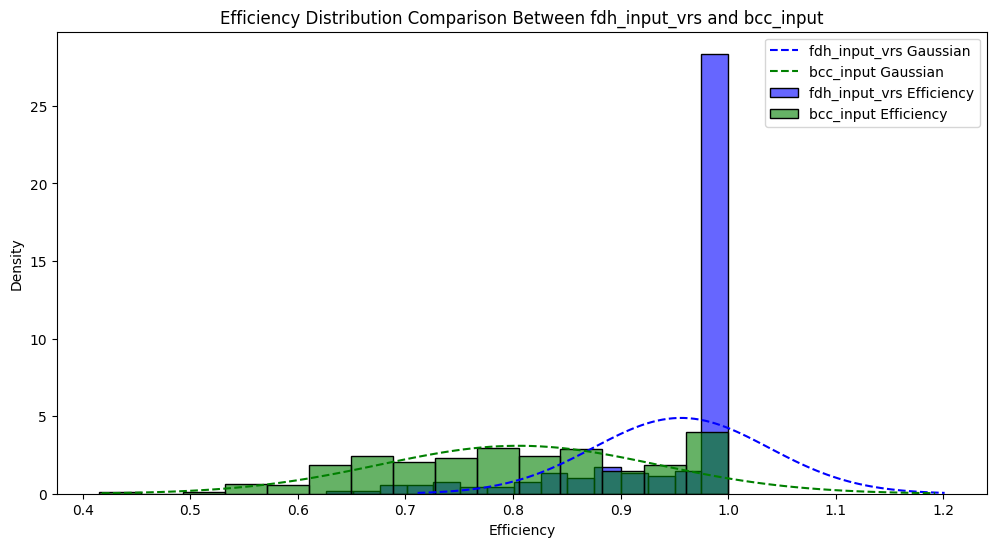

In [20]:
plot_comparison([fdh.fdh_input_vrs(), 'fdh_input_vrs'], [dea.bcc_input(), 'bcc_input'])

## Li-Test

In [10]:
data_FDHVRS = np.array(fdh.fdh_input_vrs()['efficiency']).reshape(-1, 1)  
data_DEAVRS = np.array(dea.bcc_input()['efficiency']).reshape(-1, 1)  
li_vrs = li_test(data_FDHVRS, data_DEAVRS, continuous_idx=[0], discrete_idx=[],alpha=0.05, n_boot=400)

In [11]:
li_vrs

(np.float64(0.0024937655860349127), 1, np.float64(133.5039963766592))

## Efficiency Distribution

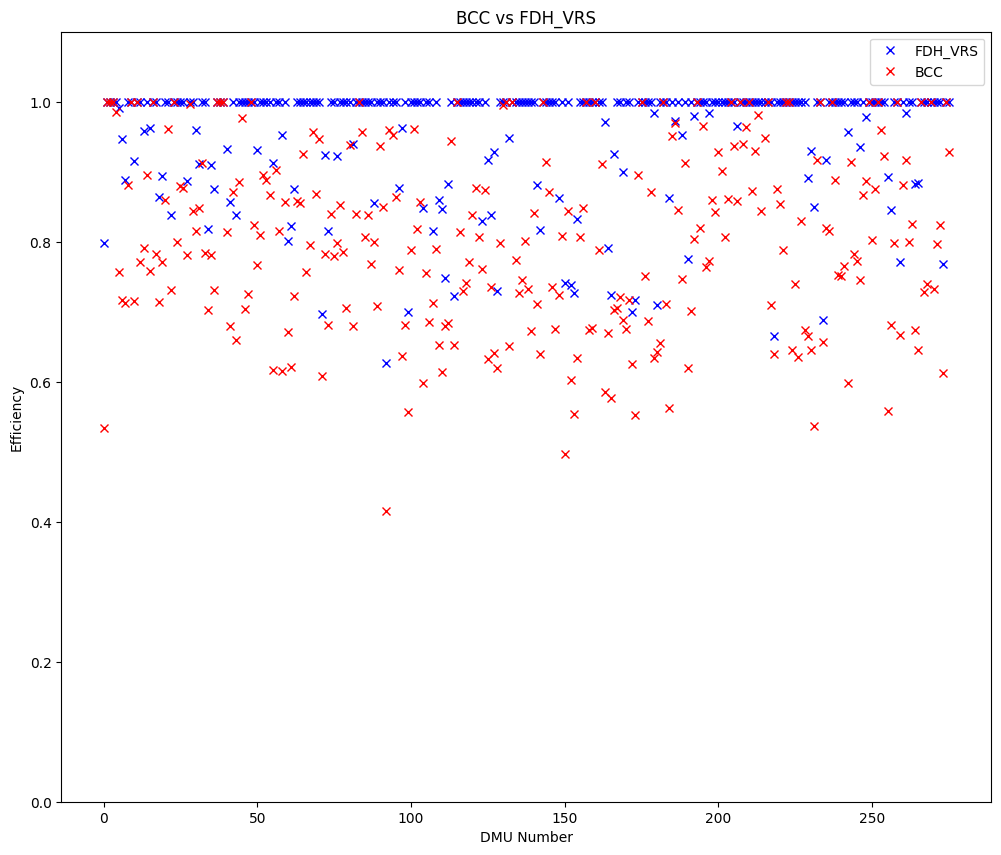

In [22]:
plt.figure(figsize=(12, 10))
df1 = fdh.fdh_input_vrs()
df2 = dea.bcc_input()
plt.plot(df1.index, df1['efficiency'], marker='x', color='b', linestyle='', label='FDH_VRS')  # Blue crosses
plt.plot(df2.index, df2['efficiency'], marker='x', color='r', linestyle='', label='BCC')  # Red crossesplt.ylim(0, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.ylim(0, 1.1)
plt.xlabel('DMU Number')
plt.ylabel('Efficiency')
plt.title('BCC vs FDH_VRS')
plt.show()


# FDH CRS (VS) CCR

In [24]:
stats_FDHCRS = stats(fdh.fdh_input_crs())
stats_FDHCRS


{'avg': np.float64(0.6688072458480683),
 'min': np.float64(0.04859147268415323),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.28183017839291613),
 'num_eff': np.int64(71),
 'num_considered': 276}

In [25]:
stats_DEACRS = stats(dea.ccr_input())
stats_DEACRS


{'avg': np.float64(0.4352184236468163),
 'min': np.float64(0.04811830085513618),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.24984823895283328),
 'num_eff': np.int64(14),
 'num_considered': 276}

fdh_input_crs - Efficiency ratio (num_eff / num_considered): 0.26
ccr_input - Efficiency ratio (num_eff / num_considered): 0.05


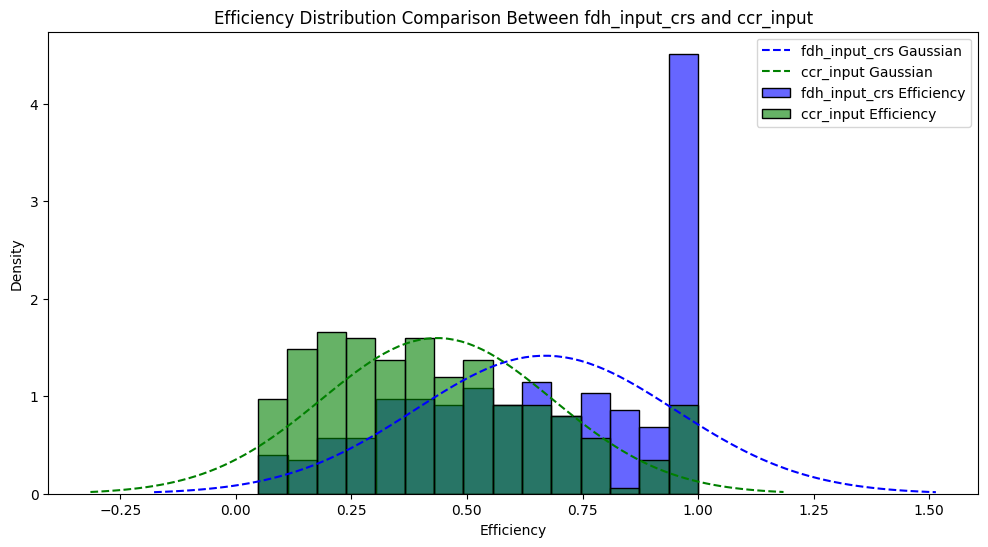

In [27]:
plot_comparison([fdh.fdh_input_crs(), 'fdh_input_crs'], [dea.ccr_input(), 'ccr_input'])


## Li-Test

In [17]:
data_FDHCRS = np.array(fdh.fdh_input_crs()['efficiency']).reshape(-1, 1)  
data_DEACRS = np.array(dea.ccr_input()['efficiency']).reshape(-1, 1)  
li_crs = li_test(data_FDHCRS, data_DEACRS, continuous_idx=[0], discrete_idx=[],alpha=0.05, n_boot=400)

In [18]:
li_crs

(np.float64(0.0024937655860349127), 1, np.float64(80.00720672074132))

## Efficiency Distribution

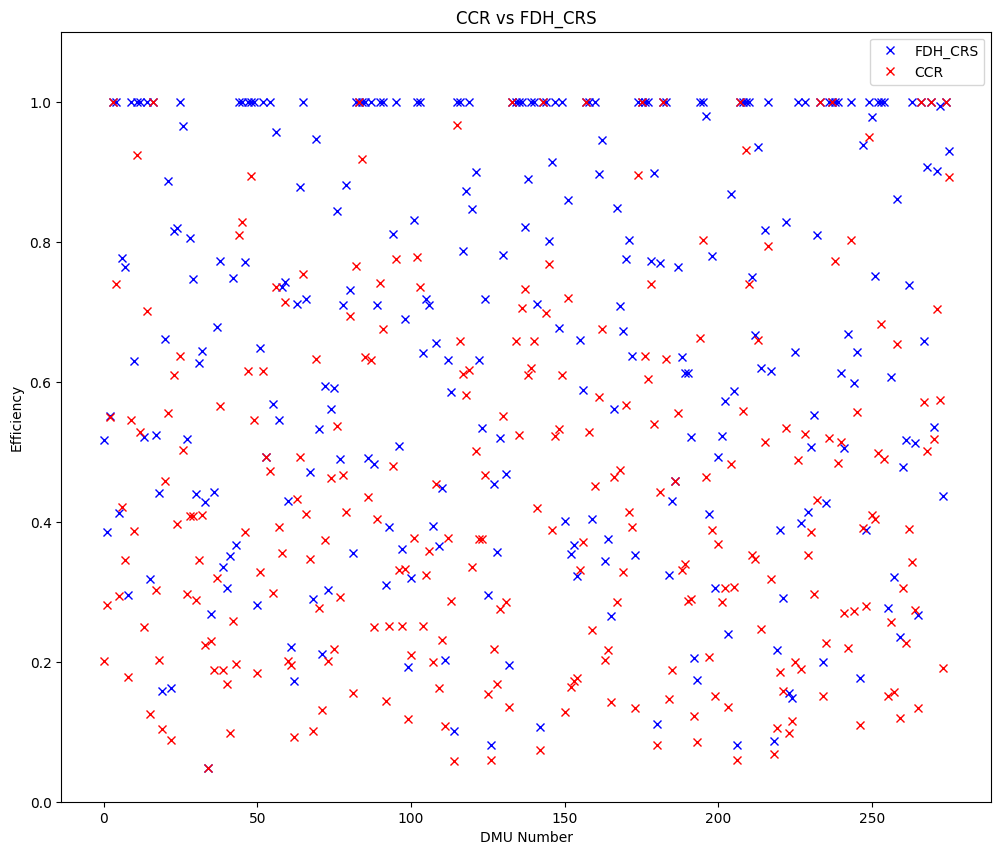

In [28]:
plt.figure(figsize=(12, 10))

df1 = fdh.fdh_input_crs()
df2 = dea.ccr_input()
plt.plot(df1.index, df1['efficiency'], marker='x', color='b', linestyle='', label='FDH_CRS')  # Blue crosses
plt.plot(df2.index, df2['efficiency'], marker='x', color='r', linestyle='', label='CCR')  # Red crossesplt.ylim(0, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.ylim(0, 1.1)
plt.xlabel('DMU Number')
plt.ylabel('Efficiency')
plt.title('CCR vs FDH_CRS')
plt.show()